In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_and_save_asc(asc_file_path, csv_file_path):
    # Lire le fichier .ASC
    data = []
    with open(asc_file_path, 'r') as file:
        for line in file:
            # Supposons que les valeurs sont séparées par des espaces
            values = line.strip().split()
            data.append(values)
    
    # Convertir les données en DataFrame
    df = pd.DataFrame(data)
    
    # Couper les trois premières colonnes
    df = df.iloc[:, 3:]
    
    # Renommer les colonnes
    df.columns = ['temps', 'amplitude']
    
    # Sauvegarder en CSV
    df.to_csv(csv_file_path, index=False)
    print(f'Le fichier CSV a été sauvegardé sous {csv_file_path}')
    
    return df
    
def find_intervals(df):
    intervals = []
    start_index = 0
    for i in range(1, len(df)):
        if df['temps'].iloc[i] < df['temps'].iloc[i - 1]:
            intervals.append([start_index, i])
            start_index = i
    intervals.append([start_index, len(df)])
    print(intervals)
    return intervals


def create_segments(df, intervals):
    segments = [df.iloc[start_idx:end_idx] for start_idx, end_idx in intervals]
    print(f"Nombre de segments: {len(segments)}")
    for idx, segment in enumerate(segments):
        print(f"Segment {idx + 1}:\n{segment}\n")
    return segments

def calculate_intervals_and_counts(segments):
    time_intervals = []
    line_counts = []
    for segment in segments:
        start_time = float(segment['temps'].iloc[0])
        end_time = float(segment['temps'].iloc[-1])
        interval = end_time - start_time
        line_count = len(segment)
        time_intervals.append(interval)
        line_counts.append(line_count)
    
    for i, (interval, count) in enumerate(zip(time_intervals, line_counts)):
        print(f"Segment {i + 1}: Intervalle de temps = {interval:.6f} secondes, Nombre de lignes = {count}")
    
    total_intervals = len(time_intervals)
    total_lines = sum(line_counts)
    print(f"Total des segments : {total_intervals}, Total des lignes : {total_lines}")
    return time_intervals, line_counts


def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df




14L2-petit bac et acier

In [3]:
asc_file_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\14L2-petit bac et acier.ASC"
csv_file_path=r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\14L2-petit bac et acier.csv"
df = read_and_save_asc(asc_file_path, csv_file_path)

Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\14L2-petit bac et acier.csv


In [5]:
df

,temps,amplitude
0,0.000000,1361.000000
1,0.000610,694.000000
2,0.001221,842.000000
3,0.001831,931.000000
4,0.002441,967.000000
...,...,...
286715,4.996948,817.000000
286716,4.997559,810.000000
286717,4.998169,810.000000
286718,4.998779,809.000000


In [7]:
intervals = find_intervals(df)
segments = create_segments(df, intervals)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528], [278528, 286720]]
Nombre de segments: 35
Segment 1:
         temps    amplitude
0     0.000000  1361.000000
1     0.000610   694.000000
2     0.001221   842.000000
3     0.001831   931.000000
4     0.002441   967.000000
...        ...          ...
8187  4.996948   866.000000
8188  4.997559   865.000000
8189  4.998169   873.000000
8190  4.998779   871.000000
8191  4.999390   871.000000

[8192 rows x 2 columns]

Segm

In [9]:
time_intervals, line_counts = calculate_intervals_and_counts(segments)


Segment 1: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 2: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 3: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 4: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 5: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 6: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 7: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 8: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 9: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 10: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 11: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 12: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 13: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 

In [11]:
def generate_amplitude_matrix(segments):
    num_points = len(segments)
    num_time_instances = max(len(segment) for segment in segments)
    amplitude_matrix = np.zeros((num_time_instances, num_points))
    for i, segment in enumerate(segments):
        for j in range(len(segment)):
            amplitude_matrix[j, i] = float(segment['amplitude'].iloc[j])
    time_values = [float(time) for time in segments[0]['temps']]
    amplitude_df = pd.DataFrame(amplitude_matrix, columns=[f'Point {i+1}' for i in range(num_points)], index=[f'{time:.6f}' for time in time_values])
    return amplitude_df



In [13]:
amplitude_df = generate_amplitude_matrix(segments)

In [15]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 26,Point 27,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33,Point 34,Point 35
0.000000,1361.0,1353.0,1347.0,1350.0,1351.0,1362.0,1361.0,1353.0,1363.0,1353.0,...,1342.0,1346.0,1341.0,1351.0,1357.0,1360.0,1356.0,1353.0,1352.0,1360.0
0.000610,694.0,710.0,712.0,704.0,702.0,693.0,677.0,676.0,680.0,681.0,...,678.0,676.0,684.0,689.0,701.0,710.0,699.0,689.0,684.0,686.0
0.001221,842.0,858.0,855.0,856.0,850.0,838.0,820.0,821.0,826.0,824.0,...,826.0,825.0,827.0,835.0,848.0,847.0,845.0,838.0,832.0,834.0
0.001831,931.0,945.0,950.0,942.0,940.0,932.0,909.0,909.0,912.0,922.0,...,917.0,910.0,914.0,924.0,935.0,939.0,932.0,923.0,919.0,922.0
0.002441,967.0,979.0,977.0,975.0,972.0,963.0,941.0,944.0,949.0,954.0,...,951.0,942.0,949.0,959.0,968.0,972.0,964.0,957.0,955.0,958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,866.0,752.0,701.0,691.0,711.0,771.0,879.0,860.0,788.0,777.0,...,631.0,634.0,645.0,634.0,597.0,596.0,619.0,666.0,722.0,817.0
4.997559,865.0,692.0,707.0,726.0,713.0,795.0,881.0,863.0,799.0,770.0,...,637.0,626.0,649.0,637.0,596.0,590.0,621.0,667.0,717.0,810.0
4.998169,873.0,708.0,741.0,681.0,718.0,780.0,899.0,860.0,787.0,770.0,...,646.0,637.0,645.0,634.0,600.0,592.0,620.0,669.0,718.0,810.0
4.998779,871.0,742.0,693.0,661.0,735.0,792.0,887.0,861.0,796.0,768.0,...,640.0,630.0,646.0,635.0,598.0,590.0,617.0,668.0,718.0,809.0


In [17]:
amplitude_df.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\14L2-petit bac et acier matrix.csv")

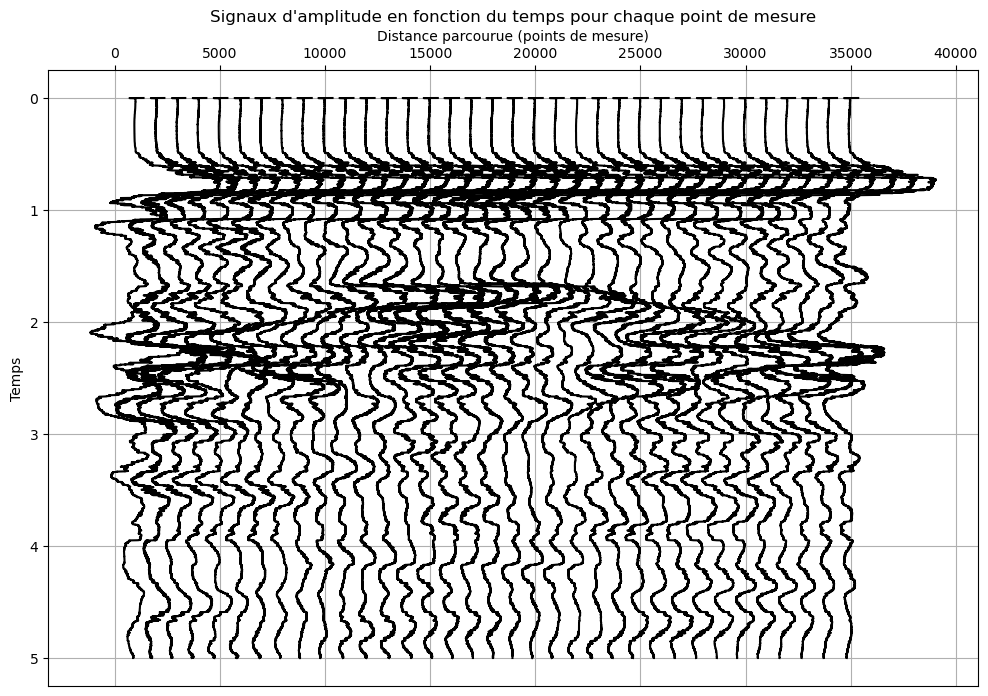

In [19]:
amplitude_matrix_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\14L2-petit bac et acier matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()


In [23]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_df.values, amplitude_df)

Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  4900
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [25]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\14L2-petit bac et acier matrix modifiee.csv")

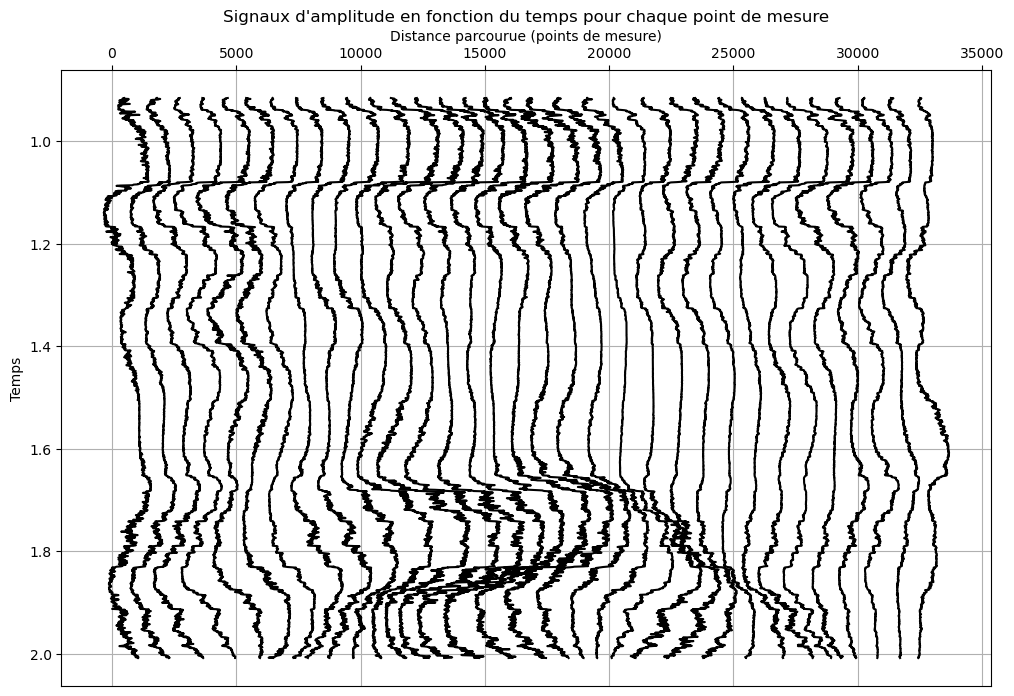

In [27]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\14L2-petit bac et acier matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

63L2- petit bac et acier

In [33]:
asc_file_path2 = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\63L2- petit bac et acier.ASC"
csv_file_path2= r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\63L2- petit bac et acier.csv"
df = read_and_save_asc(asc_file_path2, csv_file_path2)

Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\63L2- petit bac et acier.csv


In [35]:
df

,temps,amplitude
0,0.000000,1673.000000
1,0.000610,624.000000
2,0.001221,831.000000
3,0.001831,926.000000
4,0.002441,961.000000
...,...,...
278523,4.996948,1191.000000
278524,4.997559,1200.000000
278525,4.998169,1169.000000
278526,4.998779,1158.000000


In [37]:
intervals = find_intervals(df)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528]]


In [39]:
segments = create_segments(df, intervals)


Nombre de segments: 34
Segment 1:
         temps    amplitude
0     0.000000  1673.000000
1     0.000610   624.000000
2     0.001221   831.000000
3     0.001831   926.000000
4     0.002441   961.000000
...        ...          ...
8187  4.996948  1596.000000
8188  4.997559  1604.000000
8189  4.998169  1606.000000
8190  4.998779  1590.000000
8191  4.999390  1590.000000

[8192 rows x 2 columns]

Segment 2:
          temps    amplitude
8192   0.000000  1675.000000
8193   0.000610   626.000000
8194   0.001221   833.000000
8195   0.001831   926.000000
8196   0.002441   963.000000
...         ...          ...
16379  4.996948  1728.000000
16380  4.997559  1741.000000
16381  4.998169  1635.000000
16382  4.998779  1728.000000
16383  4.999390  1728.000000

[8192 rows x 2 columns]

Segment 3:
          temps    amplitude
16384  0.000000  1677.000000
16385  0.000610   617.000000
16386  0.001221   832.000000
16387  0.001831   929.000000
16388  0.002441   965.000000
...         ...          ...
24571

In [41]:
time_intervals, line_counts = calculate_intervals_and_counts(segments)


Segment 1: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 2: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 3: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 4: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 5: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 6: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 7: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 8: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 9: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 10: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 11: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 12: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 13: Intervalle de temps = 4.999390 secondes, Nombre de lignes = 8192
Segment 

In [43]:
amplitude_df = generate_amplitude_matrix(segments)

In [45]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 25,Point 26,Point 27,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33,Point 34
0.000000,1673.0,1675.0,1677.0,1668.0,1663.0,1662.0,1664.0,1661.0,1660.0,1659.0,...,1664.0,1658.0,1644.0,1656.0,1658.0,1663.0,1661.0,1682.0,1663.0,1664.0
0.000610,624.0,626.0,617.0,608.0,611.0,621.0,624.0,633.0,637.0,633.0,...,626.0,612.0,617.0,620.0,616.0,633.0,644.0,641.0,647.0,655.0
0.001221,831.0,833.0,832.0,823.0,824.0,833.0,835.0,842.0,852.0,846.0,...,834.0,833.0,825.0,826.0,827.0,840.0,857.0,853.0,857.0,856.0
0.001831,926.0,926.0,929.0,918.0,924.0,925.0,931.0,940.0,947.0,939.0,...,927.0,921.0,916.0,919.0,924.0,936.0,951.0,953.0,950.0,946.0
0.002441,961.0,963.0,965.0,960.0,961.0,963.0,960.0,977.0,978.0,977.0,...,960.0,955.0,953.0,956.0,968.0,970.0,987.0,984.0,986.0,986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,1596.0,1728.0,1669.0,1588.0,1391.0,1373.0,1275.0,1262.0,1245.0,1291.0,...,1032.0,1000.0,1068.0,1158.0,1235.0,1237.0,1234.0,1262.0,1224.0,1191.0
4.997559,1604.0,1741.0,1681.0,1562.0,1398.0,1383.0,1251.0,1276.0,1207.0,1269.0,...,1032.0,968.0,1041.0,1174.0,1249.0,1210.0,1212.0,1207.0,1260.0,1200.0
4.998169,1606.0,1635.0,1638.0,1550.0,1407.0,1372.0,1232.0,1261.0,1212.0,1261.0,...,1016.0,989.0,996.0,1148.0,1166.0,1181.0,1171.0,1217.0,1192.0,1169.0
4.998779,1590.0,1728.0,1645.0,1553.0,1495.0,1371.0,1234.0,1266.0,1251.0,1283.0,...,1040.0,1066.0,980.0,1148.0,1187.0,1180.0,1251.0,1180.0,1248.0,1158.0


In [47]:
amplitude_df.to_csv(  r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\63L2- petit bac et acier matrix.csv")

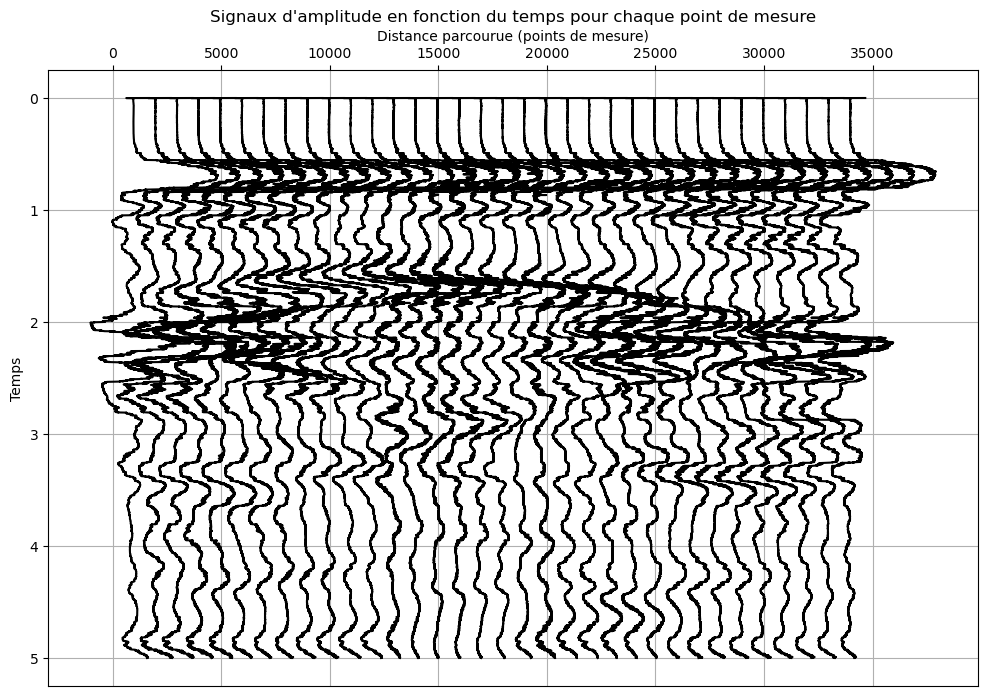

In [49]:
amplitude_matrix_path =  r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\63L2- petit bac et acier matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [53]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_df.values, amplitude_df)

Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  4900
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [55]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\63L2- petit bac et aciermatrix modifiee.csv")

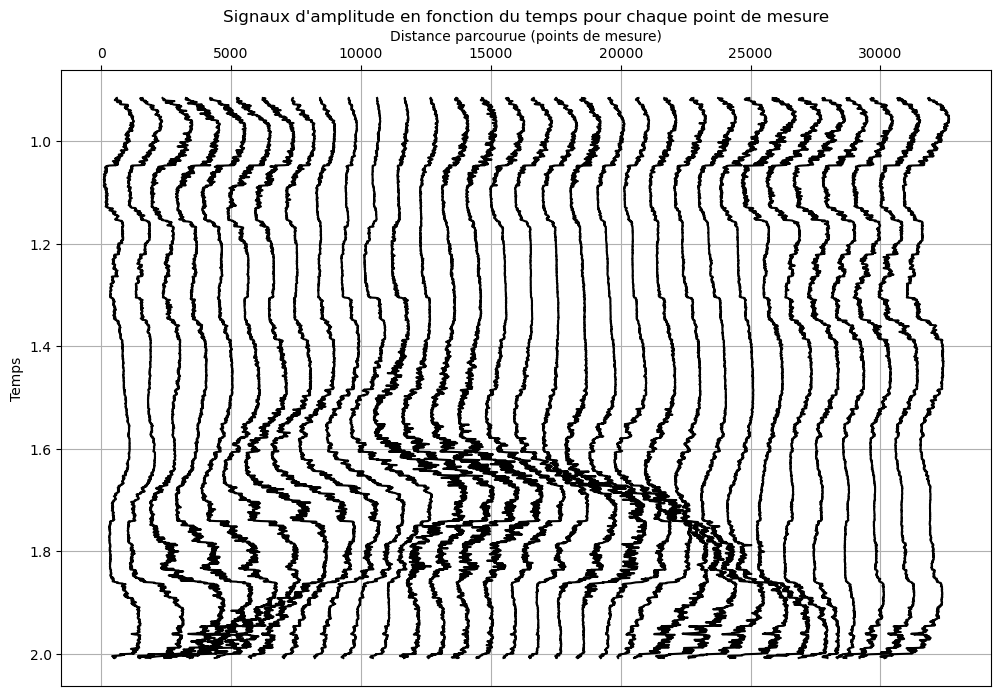

In [57]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\63L2- petit bac et aciermatrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

Limon-petit bac et acier

In [59]:
asc_file_path3 = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\Limon-petit bac et acier.ASC"
csv_file_path3 =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\Limon-petit bac et acier.csv"
df = read_and_save_asc(asc_file_path3, csv_file_path3)

Le fichier CSV a été sauvegardé sous C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\Limon-petit bac et acier.csv


In [62]:
df

,temps,amplitude
0,0.000000,1679.000000
1,0.000610,687.000000
2,0.001221,897.000000
3,0.001831,990.000000
4,0.002441,1025.000000
...,...,...
278523,4.996948,563.000000
278524,4.997559,557.000000
278525,4.998169,558.000000
278526,4.998779,566.000000


In [64]:
intervals = find_intervals(df)


[[0, 8192], [8192, 16384], [16384, 24576], [24576, 32768], [32768, 40960], [40960, 49152], [49152, 57344], [57344, 65536], [65536, 73728], [73728, 81920], [81920, 90112], [90112, 98304], [98304, 106496], [106496, 114688], [114688, 122880], [122880, 131072], [131072, 139264], [139264, 147456], [147456, 155648], [155648, 163840], [163840, 172032], [172032, 180224], [180224, 188416], [188416, 196608], [196608, 204800], [204800, 212992], [212992, 221184], [221184, 229376], [229376, 237568], [237568, 245760], [245760, 253952], [253952, 262144], [262144, 270336], [270336, 278528]]


In [66]:
segments = create_segments(df, intervals)


Nombre de segments: 34
Segment 1:
         temps    amplitude
0     0.000000  1679.000000
1     0.000610   687.000000
2     0.001221   897.000000
3     0.001831   990.000000
4     0.002441  1025.000000
...        ...          ...
8187  4.996948   469.000000
8188  4.997559   465.000000
8189  4.998169   463.000000
8190  4.998779   465.000000
8191  4.999390   465.000000

[8192 rows x 2 columns]

Segment 2:
          temps    amplitude
8192   0.000000  1661.000000
8193   0.000610   681.000000
8194   0.001221   884.000000
8195   0.001831   986.000000
8196   0.002441  1025.000000
...         ...          ...
16379  4.996948   498.000000
16380  4.997559   503.000000
16381  4.998169   494.000000
16382  4.998779   481.000000
16383  4.999390   481.000000

[8192 rows x 2 columns]

Segment 3:
          temps    amplitude
16384  0.000000  1679.000000
16385  0.000610   679.000000
16386  0.001221   886.000000
16387  0.001831   980.000000
16388  0.002441  1022.000000
...         ...          ...
24571

In [68]:
amplitude_df = generate_amplitude_matrix(segments)

In [70]:
amplitude_df

,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,...,Point 25,Point 26,Point 27,Point 28,Point 29,Point 30,Point 31,Point 32,Point 33,Point 34
0.000000,1679.0,1661.0,1679.0,1678.0,1683.0,1694.0,1690.0,1679.0,1688.0,1689.0,...,1695.0,1678.0,1687.0,1684.0,1680.0,1655.0,1676.0,1686.0,1685.0,1688.0
0.000610,687.0,681.0,679.0,680.0,672.0,671.0,667.0,668.0,673.0,669.0,...,665.0,667.0,668.0,671.0,674.0,678.0,680.0,682.0,694.0,697.0
0.001221,897.0,884.0,886.0,886.0,887.0,880.0,874.0,881.0,882.0,883.0,...,885.0,883.0,878.0,885.0,883.0,892.0,889.0,896.0,904.0,907.0
0.001831,990.0,986.0,980.0,977.0,974.0,976.0,973.0,970.0,981.0,974.0,...,978.0,972.0,977.0,970.0,982.0,982.0,985.0,988.0,998.0,1001.0
0.002441,1025.0,1025.0,1022.0,1015.0,1006.0,1008.0,1006.0,1007.0,1011.0,1016.0,...,1011.0,1015.0,1004.0,1011.0,1017.0,1020.0,1014.0,1025.0,1035.0,1035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.996948,469.0,498.0,553.0,615.0,687.0,732.0,778.0,806.0,855.0,898.0,...,886.0,875.0,825.0,756.0,631.0,608.0,562.0,510.0,569.0,563.0
4.997559,465.0,503.0,554.0,610.0,675.0,738.0,785.0,811.0,855.0,893.0,...,892.0,865.0,826.0,737.0,630.0,578.0,522.0,523.0,569.0,557.0
4.998169,463.0,494.0,547.0,621.0,703.0,732.0,784.0,808.0,846.0,898.0,...,888.0,862.0,803.0,735.0,632.0,584.0,557.0,526.0,557.0,558.0
4.998779,465.0,481.0,541.0,625.0,684.0,733.0,784.0,807.0,851.0,891.0,...,900.0,887.0,831.0,735.0,662.0,555.0,554.0,512.0,554.0,566.0


In [72]:
amplitude_df.to_csv( r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\Limon-petit bac et acier matrix.csv")

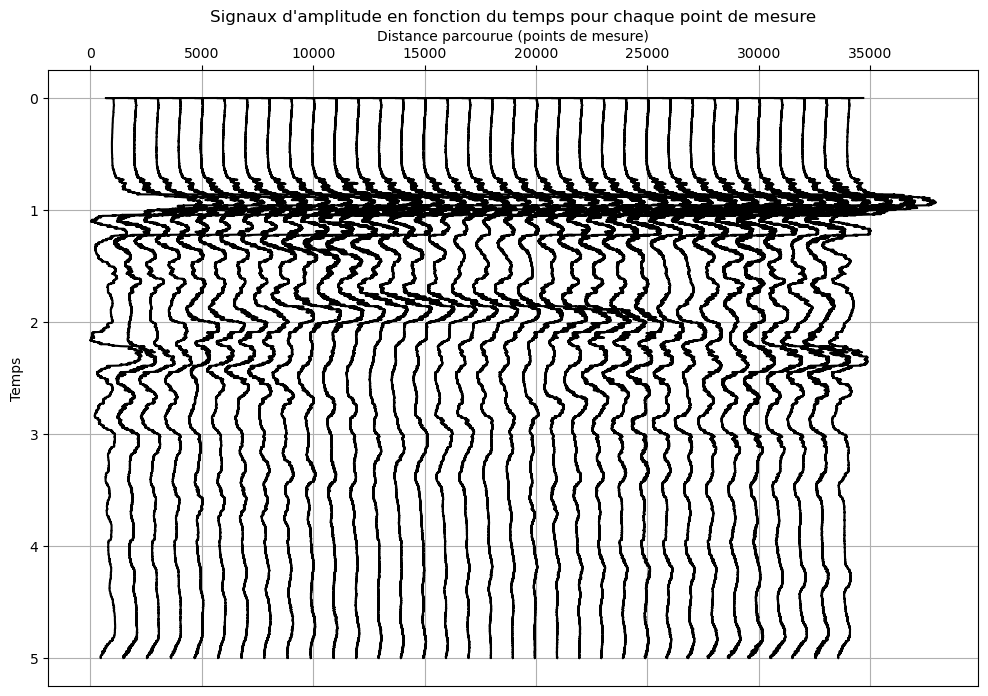

In [74]:
amplitude_matrix_path = r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\Limon-petit bac et acier matrix.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()

In [76]:
def crop_amplitude_matrix(amplitude_matrix, amplitude_df):
    # Demander les paramètres de découpe à l'utilisateur
    cut_top = int(input("Entrez la valeur pour couper la partie supérieure: "))
    cut_bottom = int(input("Entrez la valeur pour couper la partie inférieure: "))
    cut_left = int(input("Entrez la valeur pour couper la partie gauche: "))
    cut_right = int(input("Entrez la valeur pour couper la partie droite: "))
    
    # Couper les parties supérieure, inférieure, droite et gauche
    amplitude_matrix_cropped = amplitude_matrix[cut_top:-cut_bottom, cut_left:-cut_right]
    index_cropped = amplitude_df.index[cut_top:-cut_bottom]  # nouveau intervalle de temps

    # Créer un nouveau DataFrame avec les valeurs découpées
    columns_cropped = amplitude_df.columns[cut_left:-cut_right]
    amplitude_df_cropped = pd.DataFrame(amplitude_matrix_cropped, columns=columns_cropped, index=index_cropped)
    
    return amplitude_matrix_cropped, index_cropped, amplitude_df_cropped

# Exécution de la fonction de prétraitement
amplitude_matrix_cropped, index_cropped, amplitude_df_cropped = crop_amplitude_matrix(amplitude_df.values, amplitude_df)

Entrez la valeur pour couper la partie supérieure:  1500
Entrez la valeur pour couper la partie inférieure:  4900
Entrez la valeur pour couper la partie gauche:  1
Entrez la valeur pour couper la partie droite:  1


In [78]:
amplitude_df_cropped.to_csv(r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\Limon-petit bac et acier matrix modifiee.csv")

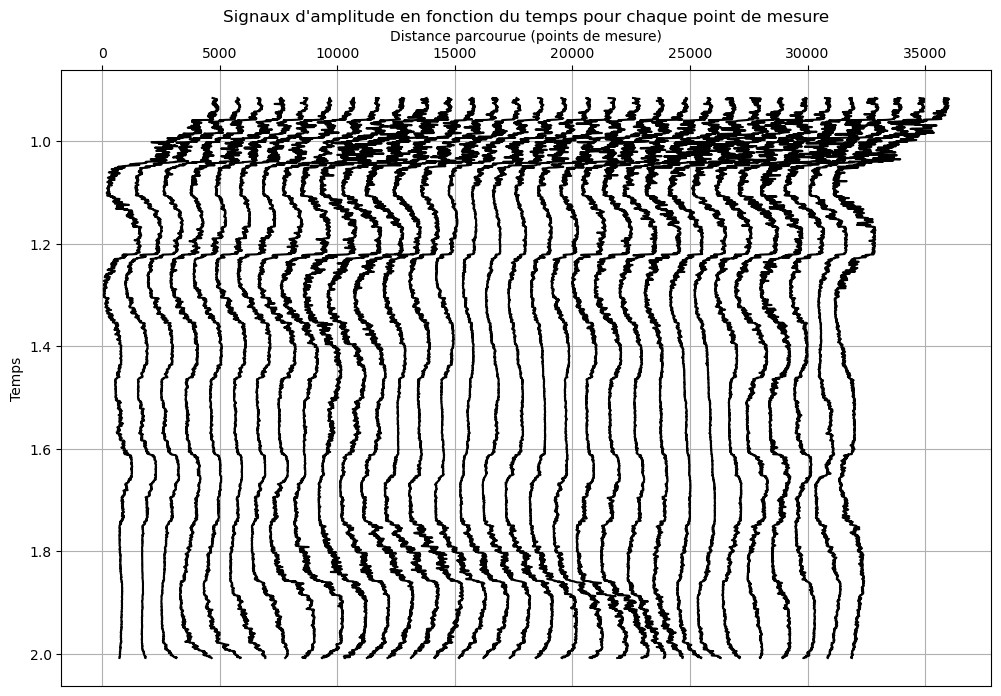

In [80]:
amplitude_matrix_path =r"C:\Users\kamar\OneDrive\Bureau\stage\Experimentation\Experimentation\3e essai- petit bac et acier\Limon-petit bac et acier matrix modifiee.csv"
amplitude_matrix_df = pd.read_csv(amplitude_matrix_path, index_col=0)

# Convertir les données en une matrice pour faciliter la manipulation
amplitude_matrix = amplitude_matrix_df.values
plt.figure(figsize=(12, 8))

# Décalage vertical pour chaque courbe pour éviter le chevauchement
offset = 1000

# Tracer les signaux pour chaque point de mesure en fonction du temps
for i in range(amplitude_matrix.shape[1]):
    plt.plot(amplitude_matrix[:, i] + i * offset, amplitude_matrix_df.index, color='k')

# Inverser l'axe y pour que le temps soit vertical
plt.gca().invert_yaxis()

# Placer l'axe x en haut
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

# Ajouter les étiquettes et le titre
plt.xlabel('Distance parcourue (points de mesure)')
plt.ylabel('Temps')
plt.title('Signaux d\'amplitude en fonction du temps pour chaque point de mesure')
plt.grid(True)

# Afficher le graphique
plt.show()